Sea level increases due to increase melting of polar ice caps and the expansion of water due to rise in temperature. Polar ice caps melt due to increase in temperature. Hence, sea level rise is a very good estimate of whether temperature rise/melting of polar ice caps is occuring.


https://climate.nasa.gov/vital-signs/sea-level/
The data used is the change in gsl wrt to average sea level of 20 years. But the plot is form first recording of 1993 which is negative. Subsequently there has been a rise, but wrt to the mean of 20 years, there hasn't been a significant increase in the sea-level.

Sea-level is not rising  - rejected 
Wald's test
test statistic 9.664002

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import seaborn as sns
import datetime
import math
import scipy

In [2]:
temp_df = pd.read_csv("cleanedGlobalTemp.csv")
temp_df["dt"] = pd.to_datetime(temp_df["dt"])
sealevel_df = pd.read_csv("GMSL_variation_1993to2017.csv")

In [3]:
#find change in sea level
sealevel_df["gmsl_change"] = sealevel_df["gmsl_change"] - sealevel_df.loc[0,"gmsl_change"]
sealevel_df.to_csv("sealeveldata1993to2017.csv")

In [4]:
#merge temperature and sealevel data.
sealevel_df = sealevel_df[sealevel_df.year <=2015]
temp_df = temp_df[temp_df.dt.dt.year >=1993]

In [5]:
sealevel_temp_df = pd.DataFrame()
sealevel_temp_df["gmsl_change"] = sealevel_df.gmsl_change.values
sealevel_temp_df["temp_change"] = temp_df.TemperatureChange.values
print(sealevel_temp_df.corr())

             gmsl_change  temp_change
gmsl_change     1.000000     0.670816
temp_change     0.670816     1.000000


Ks_2sampResult(statistic=0.010599999999999998, pvalue=0.6257839367236255)


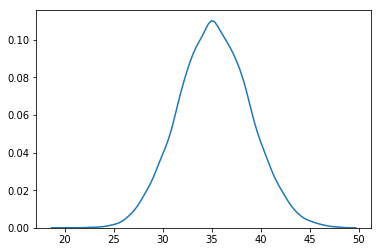

In [6]:
theta_cap_dist = []
for i in range(0,10000):
    theta_cap_dist.append(sealevel_temp_df.gmsl_change.sample(frac=0.1, replace=True).mean())
    
theta_cap_dist = pd.Series(theta_cap_dist)
norm_dist = np.random.normal(loc=theta_cap_dist.mean(), scale=theta_cap_dist.std(), size=10000)
print(scipy.stats.ks_2samp(theta_cap_dist,norm_dist))
sns.kdeplot(theta_cap_dist)
plt.show()

In [7]:
#checking if temperature change and sea level change are linearly correlated
scipy.stats.linregress(sealevel_temp_df["gmsl_change"], sealevel_temp_df["temp_change"])

LinregressResult(slope=0.005856798683226553, intercept=0.25797551256249307, rvalue=0.670816130048611, pvalue=1.925172519759745e-37, stderr=0.00039116962245588525)

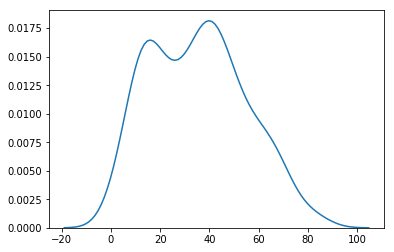

Ks_2sampResult(statistic=0.06898550724637684, pvalue=0.24578016213237963)


In [8]:
sns.kdeplot(sealevel_df.gmsl_change.values)
plt.show()

#we are doing wald's test => the estimator should be asymptotically normal. We are checking if our data samples follow normal distribution
#If our data is normal, the MLE of mean is sample mean. Since, MLE is asymptotically normal, we can do wald's test
norm_dist = np.random.normal(loc=sealevel_df.gmsl_change.mean(), scale=sealevel_df.gmsl_change.std(), size=1000)
print(scipy.stats.ks_2samp(sealevel_df.gmsl_change,norm_dist))

35.28270531400967
3.650239867195346


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  


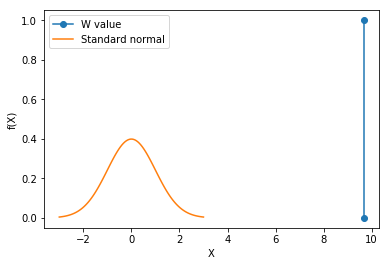

In [9]:
theta_0 = 0
theta_cap = sealevel_df.gmsl_change.mean()
se = se_cap = theta_cap_dist.std()
#se = se_not = sealevel_df.gmsl_change.std()
print(theta_cap)
print(se_cap)
w = (theta_cap - theta_0)/se
plt.plot([w,w],[0,1],marker='o',label="W value")

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x,mlab.normpdf(x, mu, sigma),label="Standard normal")
plt.xlabel('X')
plt.ylabel('f(X)')
plt.legend()
plt.show()

In [10]:
print("test statistic %f"%w)

test statistic 9.665859


35.28270531400967
3.650239867195346


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  app.launch_new_instance()


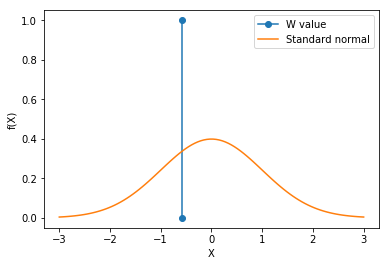

test statistic -0.580043
95% confidence interval 28.128235 to 42.437175


In [11]:
theta_0 = 37.4 #average increase in sea level from 1993 level. 1.7mm/year * 22 years https://en.wikipedia.org/wiki/Sea_level_rise
theta_cap = sealevel_df.gmsl_change.mean()
se = se_cap = theta_cap_dist.std()
#se = se_not = sealevel_df.gmsl_change.std()
print(theta_cap)
print(se_cap)
w = (theta_cap - theta_0)/se
plt.plot([w,w],[0,1],marker='o',label="W value")

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.xlabel('X')
plt.ylabel('f(X)')
plt.plot(x,mlab.normpdf(x, mu, sigma),label="Standard normal")
plt.legend()
plt.show()
print("test statistic %f"%w)
print("95%% confidence interval %f to %f"%(theta_cap-1.96*se_cap,theta_cap+1.96*se_cap))